# Predicting Tennis Match Results: Modeling

## Notebook by Lauren Dellon

## Imports

In [1]:
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

In [3]:
X_train.head()

,ace,bpFaced,bpSaved,df,rank,rank_points,1stIn,1stWon,2ndWon,SvGms,age,svpt,hand_R
0,-0.047055,-0.173456,-0.972736,-0.779044,0.487718,-0.522404,0.408725,0.122228,0.261629,0.964100,0.017642,0.386759,1
1,-0.343893,0.986393,1.121633,-0.779044,0.536558,-0.647306,0.339556,-0.154453,0.094613,-0.054573,-1.032847,0.064975,1
2,0.204200,0.777540,0.310170,1.375051,-1.271896,1.369439,-0.628815,-0.707815,2.265817,0.964100,0.280264,0.892418,1
3,-1.195625,0.086020,0.310170,-0.140949,0.356075,-0.488212,-0.767153,-0.800042,-0.907481,-1.073246,-0.770225,-1.038282,1
4,-0.709929,-0.173456,0.310170,-1.755118,-0.185297,0.046279,0.754572,0.398908,-0.239418,-0.054573,0.280264,0.019006,1


## Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train, y_train)

# Print the accuracy from the testing data.
print(accuracy_score(y_test, clf.predict(X_test)))

0.7978081874057753


The accuracy without tuning the regularization parameter C is 0.798.

In [5]:
# Tuning the regularization parameter, C

C_param_range = [0.001,0.01,0.1,1,10,100]
C_param_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
C_param_table['C_parameter'] = C_param_range

j = 0
for C in C_param_range:
    
    # Apply logistic regression model to training data
    logreg = LogisticRegression(C = C,random_state = 40)
    logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = logreg.predict(X_test)
    
    # Saving accuracy score in table
    C_param_table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
C_param_table

,C_parameter,Accuracy
0,0.001,0.791894
1,0.010,0.798736
2,0.100,0.79746
3,1.000,0.797808
4,10.000,0.79775
5,100.000,0.79775


The best C is 0.01.

In [6]:
import timeit

# Using the best regularization parameter from above
logreg = LogisticRegression(C=0.01)
start = timeit.default_timer()
logreg.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', stop-start)

Time:  0.1546209209999745


In [7]:
start = timeit.default_timer()
y_pred_lr = logreg.predict(X_test)
stop = timeit.default_timer()
print('Time: ', stop-start)
accuracy_lr = logreg.score(X_test,y_test)

# Print the accuracy from the testing data.
print(accuracy_lr)

Time:  0.002824992000000748
0.7987359387684101


In [8]:
from sklearn.metrics import confusion_matrix

conf_matrix= confusion_matrix(y_test,y_pred_lr)
print(conf_matrix)

[[6831 1776]
 [1695 6944]]


In [9]:
from sklearn.model_selection import cross_val_score

# Compute the ROC-AUC scores from cross-validation
cv_scores_test= cross_val_score(logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.87902606 0.86629053 0.86378875 0.87118311 0.87462902]
Mean cross validation train score: 0.8719207674198749
Mean cross validation test score: 0.8709834933393024
Standard deviation in cv test scores: 0.005510005834459167


## K-Nearest Neighbors (KNN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [11]:
print(train_scores)
print(test_scores)

[1.0, 0.8511538907572771, 0.860155978197843, 0.8261191000811783, 0.8305549112837759, 0.8149136031543547, 0.8149715876145193, 0.8071291893772469, 0.8083613591557463]
[0.7075843673895396, 0.7008581700104372, 0.7336773744636438, 0.7318798561985388, 0.7445784529746028, 0.7423750434883452, 0.747419691522672, 0.7473617070625073, 0.7515365881943639]


[Text(0, 0.5, 'Score'), Text(0.5, 0, '# Neighbors')]

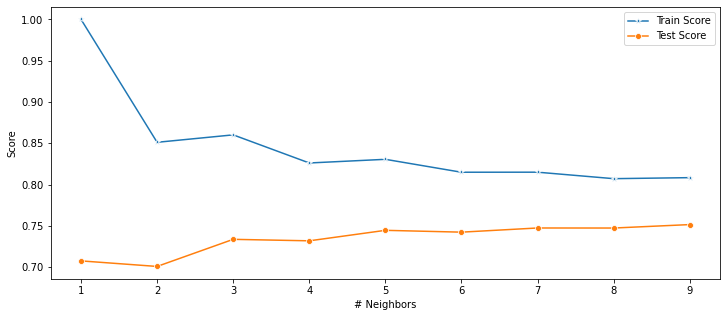

In [12]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')
p.set(xlabel='# Neighbors',ylabel='Score')

The best number of neighbors is 3. 

In [13]:
knn = KNeighborsClassifier(3)
start = timeit.default_timer()
knn.fit(X_train,y_train)
stop = timeit.default_timer()
print('Time: ', stop-start)

Time:  0.2018463450000354


In [14]:
start = timeit.default_timer()
y_pred_knn = knn.predict(X_test)
stop = timeit.default_timer()
print('Time: ', stop-start)

conf_matrix = confusion_matrix(y_test,y_pred_knn)
print(conf_matrix)

accuracy_knn = knn.score(X_test,y_test)
print(accuracy_knn)

Time:  3.6272874340000953
[[6278 2329]
 [2264 6375]]
0.7336773744636438


In [15]:
# Compute the ROC-AUC scores from cross-validation
cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_test_knn= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_knn))

[0.78269978 0.78472693 0.78000533 0.77454178 0.77748518]
Mean cross validation train score: 0.7901488452837944
Mean cross validation test score: 0.7798918002199453
Standard deviation in cv test scores: 0.0036246576399636375


## Support Vector Machine (SVM)

In [16]:
from sklearn.svm import SVC

svm = SVC()
start = timeit.default_timer()
svm.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', stop-start)

Time:  81.64130967400001


In [17]:
start = timeit.default_timer()
y_pred_svm=svm.predict(X_test)
stop = timeit.default_timer()
print('Time: ', stop-start)

conf_matrix = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix)

accuracy_svm=svm.score(X_test,y_test)
print(accuracy_svm)

Time:  8.90058581400001
[[6724 1883]
 [1499 7140]]
0.8038965557230662


In [18]:
cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_test_svm= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_svm))

[0.89942755 0.88945549 0.88270103 0.89648904 0.89921665]
Mean cross validation train score: 0.894223201134588
Mean cross validation test score: 0.8934579509314882
Standard deviation in cv test scores: 0.0064763765525047545


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
start = timeit.default_timer()
rf.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', stop-start)

Time:  7.406532428999981


In [20]:
start = timeit.default_timer()
y_pred_rf = rf.predict(X_test)
stop = timeit.default_timer()
print('Time: ', stop-start)

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

accuracy_rf=rf.score(X_test,y_test)
print(accuracy_rf)

Time:  0.3299848040001052
[[6831 1776]
 [1823 6816]]
0.7913139278673316


In [21]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_test_rf= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_rf))

[0.88897391 0.8789144  0.87636589 0.88377151 0.88135001]
Mean cross validation train score: 0.888040817610783
Mean cross validation test score: 0.8818751455991464
Standard deviation in cv test scores: 0.004321629000019859


## Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
start = timeit.default_timer()
gb.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', stop-start)

Time:  6.9961701439999615


In [23]:
start = timeit.default_timer()
y_pred_gb = gb.predict(X_test)
stop = timeit.default_timer()
print('Time: ', stop-start)

conf_matrix = confusion_matrix(y_test, y_pred_gb)
print(conf_matrix)

accuracy_gb=gb.score(X_test,y_test)
print(accuracy_gb)

Time:  0.03428721000000223
[[6910 1697]
 [1850 6789]]
0.7943291197958947


In [24]:
cv_scores_test= cross_val_score(gb,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gb_test= cv_scores_test.mean()
cv_scores_gb_train= cv_scores_train.mean()
cv_scores_std_test_gb= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_gb_train))
print ('Mean cross validation test score: ' +str(cv_scores_gb_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_gb))

[0.89750727 0.88504813 0.88055065 0.88841543 0.89036277]
Mean cross validation train score: 0.8878103194343175
Mean cross validation test score: 0.8883768497842957
Standard deviation in cv test scores: 0.005650484133086371


## Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
start = timeit.default_timer()
nb.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', stop-start)

Time:  0.02303622199997335


In [26]:
start = timeit.default_timer()
y_pred_nb = nb.predict(X_test)
stop = timeit.default_timer()
print('Time: ', stop-start)

conf_matrix = confusion_matrix(y_test, y_pred_nb)
print(conf_matrix)

accuracy_nb=nb.score(X_test,y_test)
print(accuracy_nb)

Time:  0.005196474000058515
[[6502 2105]
 [2804 5835]]
0.7153542850516061


In [27]:
cv_scores_test= cross_val_score(nb,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(nb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_test_nb= cv_scores_test.std()
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_nb))

[0.79980381 0.78898835 0.78599766 0.7876766  0.7832374 ]
Mean cross validation train score: 0.7863123340210902
Mean cross validation test score: 0.7891407638485376
Standard deviation in cv test scores: 0.005667385466825737


## Model Comparison

I applied different ML models and evaluated their performances in terms of ROC-AUC score for both the training and test data. Here I have tabulated the scores.

In [28]:
labels = ['Logistic Regression','KNN','SVM','Random Forest','Gradient Boosting','Naive Bayes']
scores_test= [cv_scores_lr_test,cv_scores_knn_test,cv_scores_svm_test,cv_scores_rf_test,cv_scores_gb_test,cv_scores_nb_test]
scores_train= [cv_scores_lr_train,cv_scores_knn_train,cv_scores_svm_train,cv_scores_rf_train,cv_scores_gb_train,cv_scores_nb_train]
accuracy_scores = [accuracy_lr,accuracy_knn,accuracy_svm,accuracy_rf,accuracy_gb,accuracy_nb]

score_tab_acc = pd.DataFrame(list(zip(labels, accuracy_scores)), 
               columns =['Algorithm', 'Model Accuracy Score']) 

score_tab = pd.DataFrame(list(zip(labels, scores_train, scores_test)), 
               columns =['Algorithm', 'ROC-AUC Train Score', 'ROC-AUC Test Score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model Accuracy Score
0  Logistic Regression              0.798736
1                  KNN              0.733677
2                  SVM              0.803897
3        Random Forest              0.791314
4    Gradient Boosting              0.794329
5          Naive Bayes              0.715354


,Algorithm,ROC-AUC Train Score,ROC-AUC Test Score
0,Logistic Regression,0.871921,0.870983
1,KNN,0.790149,0.779892
2,SVM,0.894223,0.893458
3,Random Forest,0.888041,0.881875
4,Gradient Boosting,0.887810,0.888377
5,Naive Bayes,0.786312,0.789141


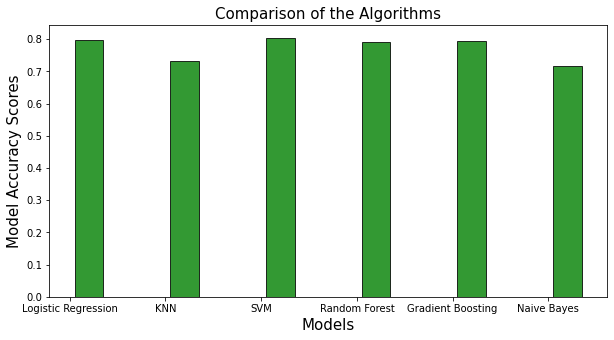

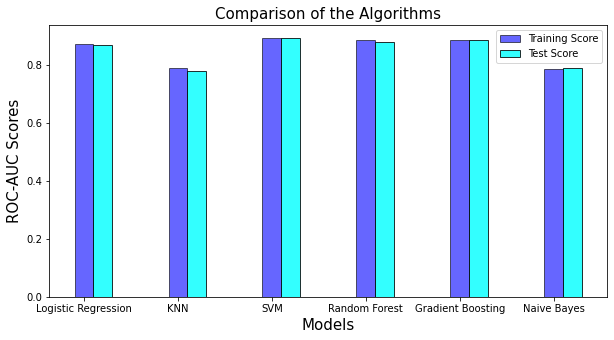

In [29]:
# Plotting the accuracy scores
index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model Accuracy Scores',fontsize=15)
plt.title('Comparison of the Algorithms',fontsize=15)
_=plt.bar(index_acc,accuracy_scores,color='green',alpha=0.8,label='Accuracy Scores',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4,5,6], labels)

# Plotting and comparing ROC-AUC train/test scores
index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC Scores',fontsize=15)
plt.title('Comparison of the Algorithms',fontsize=15)
_=plt.bar(index,scores_train,color='b',alpha=0.6,label='Training Score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,scores_test,color='cyan',alpha=0.8,label='Test Score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5,6], labels)
plt.legend()

Taking the model accuracy score, the ROC-AUC train and test scores, and the time to train and make predictions into account, the best model is the Logistic Regression Model. This is because it has one of the highest model accuracy scores and ROC-AUC train/test scores, but it is the quickest model by far. Therefore, I select it as the best model based on efficiency.

I will now attempt to achieve a better score for the Logistic Regression Model by hyperparameter tuning.

## Applying GridSearchCV for hyperparameter tuning for Logistic Regression Model

In [31]:
from sklearn.model_selection import GridSearchCV 

# Tuning solver and C value
solvers = ['newton-cg','lbfgs','liblinear']
C_values = [0.001,0.01,0.1,1,10,100]
param_grid = dict(solver=solvers,C=C_values)
              
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy',cv=3, verbose=3)

grid = grid.fit(X_train,y_train)

print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] C=0.001, solver=newton-cg .......................................
[CV] ........... C=0.001, solver=newton-cg, score=0.778, total=   0.1s
[CV] C=0.001, solver=newton-cg .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ........... C=0.001, solver=newton-cg, score=0.782, total=   0.1s
[CV] C=0.001, solver=newton-cg .......................................
[CV] ........... C=0.001, solver=newton-cg, score=0.781, total=   0.1s
[CV] C=0.001, solver=lbfgs ...........................................
[CV] ............... C=0.001, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=0.001, solver=lbfgs ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ............... C=0.001, solver=lbfgs, score=0.782, total=   0.1s
[CV] C=0.001, solver=lbfgs ...........................................
[CV] ............... C=0.001, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=0.001, solver=liblinear .......................................
[CV] ........... C=0.001, solver=liblinear, score=0.778, total=   0.1s
[CV] C=0.001, solver=liblinear .......................................
[CV] ........... C=0.001, solver=liblinear, score=0.782, total=   0.1s
[CV] C=0.001, solver=liblinear .......................................
[CV] ........... C=0.001, solver=liblinear, score=0.781, total=   0.1s
[CV] C=0.01, solver=newton-cg ........................................
[CV] ............ C=0.01, solver=newton-cg, score=0.791, total=   0.2s
[CV] C=0.01, solver=newton-cg ........................................
[CV] ............ C=0.01, solver=newton-cg, score=0.795, total=   0.2s
[CV] C=0.01, solver=newton-cg ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    7.4s finished


LogisticRegression(C=1, solver='newton-cg')
0.7941986586666974
{'C': 1, 'solver': 'newton-cg'}


After hyperparameter tuning, the best parameters for the Logistic Regression Model are C=1, solver='newton-cg'. The accuracy score is 79.42%.

Next, the feature importances are extracted from the Random Forest Model.

## Feature Importances from Random Forest Model

Text(0, 0.5, 'Feature Importance Score')

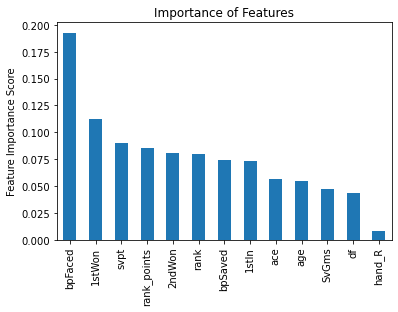

In [32]:
predictors = list(X_train)
feat_imp = pd.Series(rf.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar',title='Importance of Features')
plt.ylabel('Feature Importance Score')

## ROC-AUC Curve for Random Forest Model

In [33]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.8906876864992226


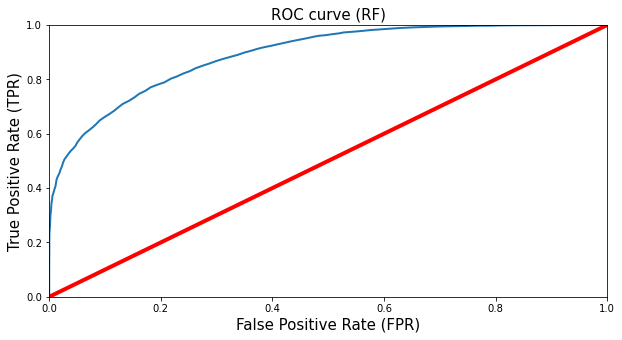

In [34]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)

## Conclusions

- In order to predict the outcome of tennis matches, I have considered 13 features.
- This is a classification problem. I have used the following classification models: Logistic Regression, K-Nearest Neighbor (KNN), Support Vector Machine (SVM), Random Forest, Gradient Boosting, Naive Bayes
- The dataframe was split into a training set and a test set. Additionally, cross-validation was performed.
- Each of the models was evaluated in terms of model accuracy score and ROC-AUC score for the training and test sets.
- The best model was the Logistic Regression model based on time to train and make predictions.
- Hyperparameter tuning was performed for the Logistic Regression model. The best parameters were C=1, solver='newton-cg'.
- Finally, in order to look at feature importances, I looked at the random forest model. The two most important features were break points faced and 1st serve points won. 
- I also plotted an ROC curve for the random forest model.

## Future Directions

- Here, I have used data for the years 2000-2019, but data is available starting from 1968. The model could possibly be improved if I use data from earlier years.
- I could try to perform more hyperparameter tuning for the individual models.
- I could investigate model stacking, which utilizes multiple learning algorithms.
- I used all 13 features in my models. I could define an importance cutoff and use features only with an importance higher than the cutoff. 

Note: The format of this notebook was adapted from https://github.com/debisree/Springboard-Data-Science-Career-Track/blob/master/Capstone_1_predicting_cab_booking_cancellation/predicting-cab-booking-cancellations-ML.ipynb 